In [1]:
import pandas as pd

df_speech = pd.read_csv("resources/speech_tests.csv")
df_affect = pd.read_csv("resources/affect_tests.csv")

agg_speech = df_speech.groupby("Run").sum()[["True positive","True negative","False positive","False negative"]]
agg_affect = df_affect.groupby("Run").sum()[["True positive","True negative","False positive","False negative"]]

# accuracy = TP+TN over all
agg_speech["Accuracy"] = (agg_speech["True positive"] + agg_speech["True negative"]) / (agg_speech.sum(axis=1))
agg_affect["Accuracy"] = (agg_affect["True positive"] + agg_affect["True negative"]) / (agg_affect.sum(axis=1))
# precision = TP / TP+FP; penalizes spurious corrections
agg_speech["Precision"] = agg_speech["True positive"] / (agg_speech["True positive"] + agg_speech["False positive"])
agg_affect["Precision"] = agg_affect["True positive"] / (agg_affect["True positive"] + agg_affect["False positive"])

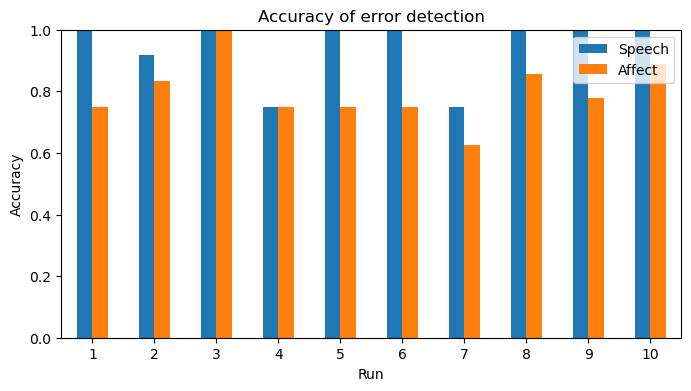

In [2]:
accuracy_df = pd.DataFrame({
    "Speech": agg_speech["Accuracy"],
    "Affect": agg_affect["Accuracy"]
})

ax = accuracy_df.plot.bar(
    figsize=(8,4),
    rot=0,              # horizontal x‑labels
    ylim=(0,1),         # force y from 0 to 1
    ylabel="Accuracy",
    title="Accuracy of error detection"
)
ax.legend(loc="upper right")

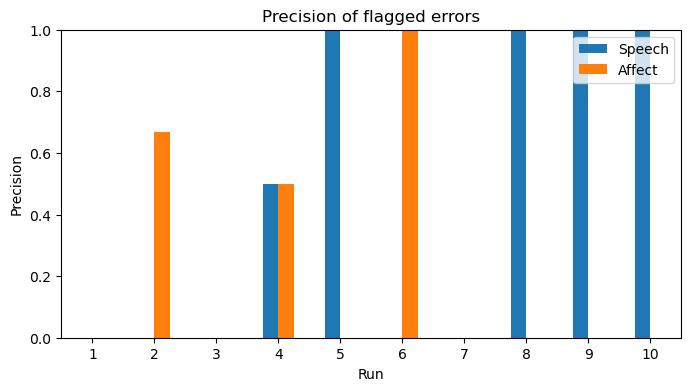

In [3]:
precision_df = pd.DataFrame({
    "Speech": agg_speech["Precision"],
    "Affect": agg_affect["Precision"]
})

ax = precision_df.plot.bar(
    figsize=(8,4),
    rot=0,              
    ylim=(0,1),         
    ylabel="Precision",
    title="Precision of flagged errors"
)
ax.legend(loc="upper right")